<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# **Construir una aplicación web de alerta de correos electrónicos de phishing con IA usando BERT y Granite**


Tiempo estimado necesario: **45** minutos


## Introducción


Imagina abrir tu bandeja de entrada y encontrar un correo que dice que acabas de ganar un premio de __10 millones de dólares__. Emocionante, ¿verdad? ¡Pero espera! ¿Realmente harías clic en el enlace? ¿Responderías con tus datos personales? ¿O te detendrías, sospechando que es solo otro intento de phishing?

Los correos de phishing están por todas partes, y aunque muchas personas saben que deben ser cautelosas, detectar las señales sutiles no siempre es fácil. Incluso cuando los filtros de spam marcan mensajes sospechosos, rara vez explican por qué. Esa falta de transparencia deja a los usuarios inseguros y, a veces, todavía en riesgo.

Este proyecto, __LLM Email Guard__, cierra esa brecha. __Ajustarás finamente (fine-tune) BERT__, un modelo transformer para procesamiento de lenguaje natural (NLP), para detectar correos de phishing con alta precisión, y luego lo combinarás con un potente __LLM empresarial (como Granite o ChatGPT)__ que puede explicar claramente el razonamiento detrás de cada decisión en lenguaje sencillo. Finalmente, empaquetarás todo en una __aplicación web de Gradio__ fácil de usar que cualquiera puede probar.

Al final, no solo entenderás cómo la IA moderna aborda el phishing, sino que también construirás una herramienta que hace que la seguridad del correo electrónico sea práctica, transparente y fácil de usar.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ynVk-9DEQyVXAtCjcCpa0A/Phishing-Image.png" alt="drawing" width="40%" style="display: block; margin: 0 auto;"/>
<p style="text-align: center;">Generado usando IA con Gemini</p>


## __Tabla de Contenidos__

<ol>
    <li><a href="#Introduction">Introducción</a></li>
    <li><a href="#Objectives">Objetivos</a></li>
    <li>
        <a href="#Background">Contexto</a>
        <ol>
            <li><a href="#What-is-BERT?-What's-its-difference-from-GPT?">¿Qué es BERT? ¿Cuál es su diferencia con GPT?</a></li>
            <li><a href="#Why-LLM-for-Explaining-Phishing-Context?">¿Por qué un LLM para explicar el contexto del phishing?</a></li>
        </ol>
    </li>
    <li><a href="#Environment-Setup">Configuración del Entorno</a></li>
        <ol>
            <li><a href="#Installing-Required-Libraries">Instalación de las Bibliotecas Requeridas</a></li>
            <li><a href="#Importing-All-Required-Libraries">Importación de Todas las Bibliotecas Requeridas</a></li>
            <li><a href="#Defining-Helper-Functions">Definición de Funciones Auxiliares</a></li>
        </ol>
    <li><a href="#Prepare-the-PhishingEmailDetectionv2.0-Dataset">Preparar el Conjunto de Datos PhishingEmailDetectionv2.0</li>
        <ol>
            <li><a href="#Load-Dataset">Cargar Conjunto de Datos</a></li>
            <li><a href="#Split-the-Dataset-into-Training-and-Testing">Dividir el Conjunto de Datos en Entrenamiento y Prueba</a></li>
            <li><a href="#Construct-a-Toy-Dataset-for-Training-Demo">Construir un Conjunto de Datos de Juguete (Toy Dataset) para la Demostración de Entrenamiento</a></li>
        </ol>
    <li>
        <a href="#Fine-Tuning-BERT-for-Phishing-Email-Classification">Ajuste Fino (Fine-Tuning) de BERT para la Clasificación de Correos de Phishing</a>
        <ol>
            <li><a href="#Load-the-Base-Model">Cargar el Modelo Base</a></li>
            <li><a href="#Preprocess-the-Text-Data">Preprocesar los Datos de Texto</a></li>
            <li><a href="#Begin-Fine-Tuning">Comenzar el Ajuste Fino</a></li>
            <li><a href="#Evaluation-on-the-Test-Dataset">Evaluación en el Conjunto de Datos de Prueba</a></li>
        </ol>
    </li>
    <li><a href="#LLM-Assistant">Asistente LLM</a></li>
    <li><a href="#Build-A-Shareable-Web-App-with-Gradio">Construir una Aplicación Web Compartible con Gradio</a></li>
    <li><a href="#Conclusion">Conclusión</li>
    <li>
        <a href="#Exercises">Ejercicios</a>
        <ol>
            <li><a href="#Exercise-1---Preprocess-the-URL-dataset-for-BERT-fine-tuning">Ejercicio 1 - Preprocesar el conjunto de datos de URL para el ajuste fino de BERT</a></li>
            <li><a href="#Exercise-2---Set-up-BERT-Trainer-with-respect-to-the-URL-dataset">Ejercicio 2 - Configurar el Trainer de BERT con respecto al conjunto de datos de URL</a></li>
        </ol>
    </li>
</ol>



## Objetivos

Al completar este laboratorio, podrás:

 * Explicar los componentes clave y la arquitectura de BERT y por qué es adecuado para el ajuste fino de clasificación.
 * Ajustar finamente (fine-tune) un modelo basado en BERT para tareas de clasificación usando las bibliotecas de Hugging Face.
 * Aprovechar un modelo de lenguaje grande (LLM) para proporcionar explicaciones legibles por humanos sobre por qué los correos electrónicos se clasifican como sospechosos.
 * Construir y compartir una aplicación web simple de Gradio que integre el detector de correos de phishing ajustado finamente con un agente basado en LLM.


----


## Contexto


### ¿Qué es BERT? ¿Cuál es su diferencia con GPT?

BERT (Representaciones de Codificador Bidireccional de Transformers) es un modelo transformer diseñado para entender el texto mirando las palabras en contexto tanto desde la izquierda como desde la derecha. Esta propiedad bidireccional hace que BERT sea especialmente efectivo para capturar el significado a nivel de oración y párrafo a través de incrustaciones (embeddings) numéricas representativas, lo que le permite adaptarse fácilmente a muchas tareas posteriores (downstream tasks) como la clasificación de texto. En detalle, para la tarea de clasificación, se adjunta un nuevo Perceptrón Multicapa (MLP) aprendible con una capa de salida softmax a la última capa del modelo BERT. Durante el entrenamiento, tanto BERT como las capas recién agregadas se ajustarán finamente (fine-tune) en función de los nuevos conjuntos de datos.

En contraste, los modelos GPT (ej. ChatGPT de OpenAI) son unidireccionales, leen el texto solo de izquierda a derecha y predicen la siguiente palabra en la secuencia. Debido a que GPT no tiene acceso al contexto completo de entrada durante el entrenamiento, es menos adecuado para tareas de clasificación. Por esta razón, BERT suele ser la opción preferida para el ajuste fino en tareas posteriores que requieren una comprensión profunda del texto.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/TZU0xfrskSllMPVnn__ONA/Screenshot%202025-09-16%20at%203-31-14%E2%80%AFPM.png" alt="drawing" width="70%" style="display: block; margin: 0 auto;"/>




### ¿Por qué un LLM para explicar el contexto del phishing?

Un Modelo de Lenguaje Grande (LLM) es un modelo avanzado de machine learning entrenado en cantidades masivas de datos de texto para comprender, generar y razonar sobre el lenguaje humano. Ejemplos populares incluyen ChatGPT, LLaMA y Grok. A diferencia de los clasificadores tradicionales que solo emiten “spam” vs. “ham” (legítimo), los LLM aportan comprensión contextual, razonamiento y explicabilidad al análisis de texto.

En el contexto de la detección de correos de phishing, un LLM es útil porque:

1. __Extracción de Palabras Clave Sospechosas:__ Los LLM pueden identificar y resaltar palabras o frases en un correo electrónico que generalmente se asocian con intentos de phishing (ej., “verifique su cuenta”, “urgente”, “haga clic aquí”). Esto hace que el sistema sea más transparente al mostrar por qué se marcó un correo electrónico, no solo la predicción.<br>

2. __Explicabilidad y Confianza del Usuario:__ En lugar de una predicción de caja negra, el LLM puede resumir en lenguaje sencillo por qué un mensaje parece sospechoso (ej., “El dominio del remitente es inusual y el mensaje crea urgencia”). Esto mejora la confianza y la adopción de herramientas de ciberseguridad.

3. __Detección Adaptativa:__ Los atacantes cambian constantemente la redacción para eludir la detección. Los LLM, debido a sus amplios datos de entrenamiento y su capacidad de generalización, pueden detectar nuevas estrategias de phishing más allá de la distribución de entrenamiento de un clasificador pequeño, actuando eficazmente como una capa de seguridad adicional que atrapa amenazas que escapan al modelo principal.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/WTvQ7aC1dkyh_1tBGvH-Rw/LLM-as-Phishing-Explainer.png" alt="drawing" width="500" style="display: block; margin: 0 auto;"/>
<p style="text-align: center;">Generado usando IA con Gemini</p>


## Configuración del Entorno


Para este proyecto, vamos a utilizar las siguientes bibliotecas:

* [``torch``](https://docs.pytorch.org/docs/stable/torch.html) para procesar datos tensoriales y herramientas esenciales de deep learning para el entrenamiento de IA.
* [``transformers``](https://huggingface.co/docs/transformers/en/index) para varios modelos de lenguaje y multimodales de última generación de código abierto.
* [``datasets``](https://huggingface.co/docs/datasets/en/index) para una amplia gama de conjuntos de datos estructurados para tareas de NLP y visión.
* [``accelerate``](https://huggingface.co/docs/accelerate/en/index) para herramientas que optimizan y simplifican el proceso de entrenamiento de IA.
* [``ibm_watsonx_ai``](https://ibm.github.io/watsonx-ai-python-sdk/) para las API y servicios de IBM Watson.ai
* [``gradio``](https://www.gradio.app/guides/installing-gradio-in-a-virtual-environment) para el desarrollo de interfaces de demostración web.
* [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) para herramientas adicionales de trazado de gráficos.


### Instalación de las Bibliotecas Requeridas


Dado que las bibliotecas requeridas no están preinstaladas en el entorno, primero debemos tomar _unos 10 minutos_ para instalarlas para desarrollos posteriores.

__Ejecuta la siguiente celda para instalar.__ La línea ``%%capture`` suprime todos los mensajes de instalación de los paquetes, por lo que NO verás ninguna salida al ejecutar esta celda.

<p style="color:#c62828; font-size:1.1rem; font-weight:600; margin:0;">
  Esto puede tardar más de 10 minutos
</p>


In [112]:
%%capture
%pip install torch==2.8.0
%pip install transformers==4.55.4
%pip install datasets==3.6.0
%pip install accelerate==1.10.1
%pip install ibm-watsonx-ai==1.4.7
%pip install gradio==5.45.0
%pip install matplotlib==3.10.6
%pip install langchain langchain-core
%pip install langchain langchain-ollama

### Importación de Todas las Bibliotecas Requeridas


Por favor, ejecuta la siguiente celda para importar las bibliotecas


In [113]:
# Bibliotecas para el ajuste fino (fine-tuning) de BERT
import torch
import transformers
import urllib.request
from datasets import load_dataset, Dataset, DatasetDict, concatenate_datasets
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, pipeline

from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage, SystemMessage


# Cliente de Watsonx.ai
from ibm_watsonx_ai import Credentials
from ibm_watsonx_ai.foundation_models import ModelInference
from ibm_watsonx_ai.foundation_models.schema import TextChatParameters, TextChatResponseFormat, TextChatResponseFormatType

# Gradio para una aplicación web simple y compartible
import gradio as gr

# Básicos
import numpy as np
import matplotlib.pyplot as plt

# El siguiente código se usa para suprimir advertencias
import warnings
warnings.filterwarnings("ignore")

# La siguiente biblioteca es para gestionar directorios/carpetas
import os

### Definición de Funciones Auxiliares


Esta sección define dos funciones auxiliares para construir conjuntos de datos de prueba (toy datasets) y una función auxiliar para la evaluación del modelo.

Nota: Son solo funciones auxiliares para mantener el código limpio y no son el foco de este proyecto. Por lo tanto, siéntete libre de solo echarles un vistazo, lo cual no afectará tu comprensión del contenido principal.


In [80]:
def split_data_to_email_url(dataset):
    """
    Esta función divide el conjunto de datos mixto original en
    conjuntos de datos de correo electrónico y de URL. El correo electrónico tiene las etiquetas 0 y 1,
    y las URLs tienen las etiquetas 2 y 3.
    """
    emails = []
    urls = []

    for data_type in ['train', 'validation', 'test']:
        email_content = dataset[data_type].filter(lambda sample: sample['label'] in [0,1])
        url_content = dataset[data_type].filter(lambda sample: sample['label'] in [2,3])

        emails.append(email_content)
        urls.append(url_content)

    ds_email = concatenate_datasets(emails)
    ds_url = concatenate_datasets(urls)

    return ds_email, ds_url

def full_toy_data(dataset_full, n_train_legit, n_train_phish, n_test):
    """
    Esta función construye el conjunto de datos de juguete (toy dataset) para este proyecto.
    """
    ds_train_leg = dataset_full['train'].filter(lambda example: example['label']==0).shuffle(seed=0).select(range(n_train_legit))
    ds_train_phi = dataset_full['train'].filter(lambda example: example['label']==1).shuffle(seed=0).select(range(n_train_phish))
    content_toy = []
    label_toy = []

    for i in range(n_train_legit):
        content_toy.append(ds_train_leg[i]['content'])
        label_toy.append(ds_train_leg[i]['label'])
        content_toy.append(ds_train_phi[i]['content'])
        label_toy.append(ds_train_phi[i]['label'])

    ds_train = Dataset.from_dict({'content':content_toy, 'label':label_toy})
    ds_test = dataset_full['test'].select(range(n_test))
    ds = DatasetDict({'train':ds_train, 'test':ds_test})
    return ds

def evaluate(preds, labels):
    """
    Esta función evalúa el rendimiento del modelo comparando
    sus predicciones con las etiquetas reales (ground-truth). Se evalúan cinco cosas:
        1. Exactitud (Accuracy): porcentaje de predicciones correctas
        2. Precisión (Precision): porcentaje de positivos correctos entre todos los positivos predichos
        3. Recall: porcentaje de positivos correctos entre todos los positivos reales
        4. Puntuación F1 (F1-score): la media armónica de precisión y recall
        5. Matriz de Confusión: visualiza frecuencias de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN)
    """
    preds = np.array(preds)
    labels = np.array(labels)

    # Elementos de la matriz de confusión
    TP = np.sum((preds == 1) & (labels == 1))  # phishing predicho correctamente
    TN = np.sum((preds == 0) & (labels == 0))  # legítimo predicho correctamente
    FP = np.sum((preds == 1) & (labels == 0))  # falsa alarma
    FN = np.sum((preds == 0) & (labels == 1))  # phishing omitido

    # Métricas
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"Puntuación F1 : {f1:.4f}")

    # Arreglo de la matriz de confusión
    cm = np.array([[TN, FP],
                   [FN, TP]])
    classes = ["Legítimo", "Phishing"]

    # Añadir etiquetas de texto
    labels = [["TP", "FP"],
              ["FN", "TN"]]

    # Graficar la matriz de confusión manualmente
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(cm, cmap="Blues")

    # Mostrar números dentro de las celdas
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, f"{labels[i][j]}={cm[i, j]}", ha="center", va="center", color="black", fontsize=12)

    # Añadir etiquetas
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    ax.set_xlabel("Etiqueta Predicha")
    ax.set_ylabel("Etiqueta Verdadera")
    ax.set_title("Matriz de Confusión")

    # Añadir barra de color
    plt.colorbar(im, ax=ax)
    plt.show()

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}


## Preparar el Conjunto de Datos PhishingEmailDetectionv2.0

Para comenzar a ajustar finamente un modelo de lenguaje para la detección de correos de phishing, debemos preparar un conjunto de datos válido. Usamos un conjunto de datos existente [PhishingEmailDetectionv2.0](https://huggingface.co/datasets/cybersectony/PhishingEmailDetectionv2.0) disponible en huggingface. Aquí hay algunas estadísticas descriptivas del conjunto de datos:

Antes de entrenar, es importante entender los datos con los que estamos trabajando. A continuación se presentan algunas estadísticas descriptivas del conjunto de datos:

 * __Número de muestras:__ 22,644 correos electrónicos y 177,356 URL
 * __Clases:__ Correo legítimo (0), Correo de phishing (1), URL legítima (2), URL de phishing (3)
 * __Distribución de clases:__ 5.7% (0), 5.6% (1), 44.3% (2), 44.5% (3)

Estas estadísticas proporcionan una visión general rápida del equilibrio, tamaño y características del texto del conjunto de datos. Primero, notamos que el conjunto de datos contiene múltiples tipos de contenido; dado que nuestro enfoque está en el texto del correo electrónico, extraeremos solo los datos relacionados con el correo electrónico. Segundo, el conjunto de datos está bastante equilibrado entre las dos clases, proporcionando una base sólida para un entrenamiento efectivo del modelo.

A continuación, procederemos a cargar el conjunto de datos en Hugging Face datasets y prepararlo para el entrenamiento con un modelo basado en BERT.


### Cargar Conjunto de Datos


Cargamos el conjunto de datos directamente desde huggingface.


In [81]:
#Cargar conjunto de datos
ds = load_dataset("cybersectony/PhishingEmailDetectionv2.0")
label_mapping = {0: 'correo legítimo', 1: 'correo de phishing', 2: 'url legítima', 3: 'url de phishing'}
print(ds)

DatasetDict({
    train: Dataset({
        features: ['content', 'label'],
        num_rows: 120000
    })
    validation: Dataset({
        features: ['content', 'label'],
        num_rows: 20000
    })
    test: Dataset({
        features: ['content', 'label'],
        num_rows: 60000
    })
})


Puedes obtener fácilmente los valores únicos de la columna de etiquetas de tu conjunto de datos.


In [82]:
unique_labels = set(ds['train']['label'])
print("etiquetas_únicas",unique_labels)

etiquetas_únicas {0, 1, 2, 3}


podemos ver cómo se mapea cada etiqueta a través del diccionario


In [83]:
[f"Índice de etiqueta {label} → Valor de etiqueta '{label_mapping[label]}'" for label in unique_labels]

["Índice de etiqueta 0 → Valor de etiqueta 'correo legítimo'",
 "Índice de etiqueta 1 → Valor de etiqueta 'correo de phishing'",
 "Índice de etiqueta 2 → Valor de etiqueta 'url legítima'",
 "Índice de etiqueta 3 → Valor de etiqueta 'url de phishing'"]

Para obtener la muestra número 100 de la división de entrenamiento.


In [84]:
sample = ds['train'][100]
sample

{'content': 'https://www.schloebe.de', 'label': 2}

Aquí la etiqueta ```2``` es decir, url legítima y la URL ```[https://www.schloebe.de](https://www.schloebe.de)```


Este conjunto de datos contiene tres porciones: entrenamiento (train), validación (validation) y prueba (test).

Cada muestra contiene dos campos de datos:
- Primer campo: "content" para el cuerpo del correo/url
- Segundo campo: "label" para la clase.

Como mencionamos, necesitamos extraer los datos de correo electrónico del conjunto de datos. Por lo tanto, recorreremos las tres porciones y recopilaremos solo las muestras de correo electrónico usando la función auxiliar ``split_data_to_email_url``.


In [85]:
#Separar el conjunto de datos de email y de url
ds_email, ds_url = split_data_to_email_url(ds)

Necesitamos eliminar los datos faltantes, por ejemplo, estos con contenido "empty":


In [86]:
ds_email.filter(lambda sample: sample['content']=='empty')[0] #seleccionar una fila de datos con valor faltante usando la función filter

{'content': 'empty', 'label': 1}

Eliminar las filas vacías con la función filter.


In [87]:
ds_email = ds_email.filter(lambda sample: sample['content']!='empty')
ds_url = ds_url.filter(lambda sample: sample['content']!='empty')

# Para ds_url, también necesitamos reasignar las etiquetas a 0 y 1
new_url_labels = {2:0,3:1}
def remap_labels(example):
    example['label'] = new_url_labels[example['label']]
    return example
ds_url = ds_url.map(remap_labels)

Verificar si hay duplicados dentro del conjunto de datos ds_email.


In [88]:
ds_email.to_pandas().loc[ds_email.to_pandas()['content'] == ds_email.to_pandas().value_counts().index[0][0]]

,content,label
4094,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1
4764,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1
4771,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1
6278,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1
7622,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1
10123,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1
13403,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1
14217,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1
14301,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1
14701,"\nÃÂ \nDear \n Homeowner,ÃÂ ...",1


La larga lista anterior significa que hay múltiples duplicados de datos para este contenido de correo electrónico objetivo. Eliminemos todos los duplicados de este tipo del conjunto de datos.


In [89]:
# Todos los correos únicos
unique_df = ds_email.to_pandas().drop_duplicates(subset="content", keep="first")

# Convertir de nuevo a Datasets
ds_email = Dataset.from_pandas(unique_df)

El conjunto de datos de URL se deja para los ejercicios. Imprimamos dos correos de muestra de ds_email.


In [90]:
#Explorar los datos de entrenamiento
num_data = ds_email.num_rows
legit_emails = ds_email.filter(lambda example: example['label']==0)
phish_emails = ds_email.filter(lambda example: example['label']==1)
example_legit_email = legit_emails[0]['content']
example_phish_email = phish_emails[0]['content']
print(f'Hay {num_data} datos de entrenamiento en total. {legit_emails.num_rows} correos legítimos y {phish_emails.num_rows} correos de phishing.')
print()
print(f'Aquí hay una muestra de correo legítimo: {example_legit_email}.')
print()
print(f'Aquí hay una muestra de correo de phishing: {example_phish_email}.')

Filter: 100%|██████████| 17536/17536 [00:00<00:00, 92860.20 examples/s]

Hay 17536 datos de entrenamiento en total. 10979 correos legítimos y 6557 correos de phishing.

Aquí hay una muestra de correo legítimo: revised - transitional steering committee meeting here are the details for the transitional steering committee meetings : this meeting will take place every wednesday at 10 : 00 a . m . ( cst ) commencing on february 6 th . dial - in number : 877 - 232 - 4392 host code : 505813 ( louise ) participant code : 969747 tammie schoppe enron americas - office of the chair assistant to louise kitchen 713 . 853 . 4220 office 713 . 646 . 8562 fax 713 . 253 . 2131 mobile.

Aquí hay una muestra de correo de phishing: the no . 1 source for software superstore . get discounted oem software from online store ! http : / / xcwz . ova 3 rnohlyod 3 po . tussurke . net the strictest law sometimes becomes the severest injustice . i bought some powdered water yesterday . i don ' t know what to add ..


### Dividir el Conjunto de Datos en Entrenamiento y Prueba


Usamos la función incorporada de los conjuntos de datos de huggingface para realizar la división.

Un argumento que necesitamos establecer es ``test_size``, que determina la proporción de la porción de prueba con respecto a la porción de entrenamiento. La elección popular para ``test_size`` es 0.2, es decir, el 20% del conjunto de datos se seleccionará aleatoriamente para formar la porción de prueba. También hay otras opciones, por ejemplo, división 75 a 25 y división 70 a 30.

En este cuaderno, establecemos ``test_size=0.2``. Primero barajamos aleatoriamente el conjunto de datos con una ``seed=0`` específica con fines de reproducibilidad usando ``shuffle``, y luego usamos ``train_test_split`` para realizar la división.


In [91]:
#División entrenamiento-prueba (train-test split)
ds_email = ds_email.shuffle(seed=0) #aleatorio
ds_email = ds_email.train_test_split(test_size=0.2, shuffle=False)

In [92]:
#Obtener información del conjunto de datos dividido
ds_email

DatasetDict({
    train: Dataset({
        features: ['content', 'label', '__index_level_0__'],
        num_rows: 14028
    })
    test: Dataset({
        features: ['content', 'label', '__index_level_0__'],
        num_rows: 3508
    })
})

### Construir un Conjunto de Datos de Juguete (Toy Dataset) para la Demostración de Entrenamiento


Dado que el entorno no está equipado con GPU (Unidades de Procesamiento Gráfico), para demostrar cómo ajustar finamente un detector de correos de phishing basado en BERT, necesitamos construir un conjunto de datos mucho más pequeño a partir del ds_email original. Lo que haremos aquí es muestrear aleatoriamente 3 correos legítimos y 3 correos de phishing (para mantener las dos clases equilibradas), y muestrear aleatoriamente 1 correo del conjunto de datos de prueba. Estos dos procesos de muestreo están envueltos dentro de la función auxiliar ``full_toy_data``.

Nuevamente, este conjunto de datos de juguete es solo para demostración aquí en el entorno en línea. Si tienes GPU locales, ignora esta construcción del conjunto de datos de juguete y dirígete directamente a los pasos de entrenamiento. Si estás haciendo tu código en línea, no te preocupes, te proporcionaremos una configuración de modelo pre-entrenada y guardada más adelante.


In [93]:
#Debido a restricciones de recursos computacionales, solo seleccionamos una pequeña porción del conjunto de datos de correo electrónico para demostrar el proceso de entrenamiento.
ds_toy = full_toy_data(dataset_full=ds_email,
                       n_train_legit=3,
                       n_train_phish=3,
                       n_test=1)

Filter: 100%|██████████| 14028/14028 [00:00<00:00, 49115.65 examples/s]


El siguiente código imprime la información del conjunto de datos de juguete, y luego verificamos si las estadísticas descriptivas se ven correctas.


In [94]:
#Verificar si ds_toy se ve bien
print(ds_toy)

DatasetDict({
    train: Dataset({
        features: ['content', 'label'],
        num_rows: 6
    })
    test: Dataset({
        features: ['content', 'label', '__index_level_0__'],
        num_rows: 1
    })
})


## Ajuste Fino (Fine-Tuning) de BERT para la Clasificación de Correos de Phishing


Hemos preparado con éxito el conjunto de datos, y ahora estamos listos para crear el modelo basado en BERT y ajustarlo finamente. La biblioteca Hugging Face Transformers proporciona una amplia selección de modelos pre-entrenados accesibles, incluidas varias versiones de __BERT__, __RoBERTa__ y sus contrapartes ligeras destiladas. Para este proyecto, elegimos el modelo ``distilbert-base-uncased`` como nuestro esqueleto (backbone) pre-entrenado.

``distilbert-base-uncased`` es una versión _destilada_ de BERT que retiene la mayor parte del rendimiento de BERT mientras es más rápida y eficiente en memoria. El modelo ha sido entrenado en un gran corpus de texto en inglés y no diferencia entre letras mayúsculas y minúsculas (“uncased”), lo cual es particularmente útil en la detección de phishing ya que los atacantes a menudo varían el uso de mayúsculas para evadir filtros de palabras clave simples.

El proceso de “destilación” se refiere a la destilación de conocimiento, una técnica donde un modelo más pequeño (el estudiante) es entrenado para imitar el comportamiento de un modelo más grande y complejo (el maestro). En el caso de DistilBERT, el modelo estudiante aprende de BERT aproximando sus distribuciones de salida, capturando la mayor parte de su poder de representación mientras reduce el tamaño y el costo computacional. Como resultado, DistilBERT es aproximadamente un __40% más pequeño__ y un __60% más rápido__ que BERT, pero conserva alrededor del __97%__ de su rendimiento en benchmarks clave de NLP.


### Cargar el Modelo Base


Comenzamos definiendo la variable que almacena el nombre del modelo.


In [131]:
# Elegir un modelo pre-entrenado
model_name = "distilbert-base-uncased"

Luego cargamos dos cosas para prepararnos para el preprocesamiento de texto y el ajuste fino:

- ``tokenizer`` (tokenizador) usando ``AutoTokenizer``:
  - Entrada: ``model_name``
  - Convierte el texto sin procesar en tokens numéricos que el modelo puede entender.
  - Divide el texto en unidades más pequeñas como subpalabras, caracteres o piezas de palabras, ej., "phishing" -> "phish" y "ing".
  - A cada token se le asigna un __ID entero__ del vocabulario del modelo, ej., "phish" -> 101, "ing" -> 310.
  - Para los modelos de lenguaje ``uncased`` (que no distinguen mayúsculas/minúsculas), sus tokenizadores mapean la oración original y su versión en minúsculas a la misma salida. Por ejemplo, "Where is Peter" y "where is peter" serán tokenizados con los mismos tokens.


- ``model`` (modelo) usando ``AutoModelForSequenceClassification``:
  - Entrada: ``model_name`` y ``num_labels`` (número de clases, que es 2 en nuestro caso: phishing 0 o legítimo 1).
  - Configura el modelo pre-entrenado especificado por ``model_name``.
  - Inicializa algunos pesos nuevos para el ajuste fino posterior (downstream fine-tuning).


In [132]:
#Tokenizador
tokenizer = AutoTokenizer.from_pretrained(model_name)

num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Preprocesar los Datos de Texto


El siguiente código prepara el conjunto de datos sin procesar para que pueda ser alimentado a un modelo transformer.

Los Modelos de Lenguaje Grandes (LLM) representan las palabras como **vectores**. Cada frase se divide en unidades más pequeñas, generalmente palabras o subpalabras, llamadas **tokens**. A cada token se le asigna un **índice de token** único. Estos índices son cómo el modelo “ve” el texto.

Hay muchos enfoques para la tokenización, pero en este cuaderno usamos el tokenizador incorporado de Hugging Face.

Veamos cómo funciona el tokenizador en la siguiente muestra:


In [97]:
example=ds_toy['train'][0]['content']
print(example)

On Fri, 6 Sep 2002, Russell Turpin wrote:> You seem not to know what a "poor man's divorce" is.I know very little in general. I hope you can excuse me for that.> It is an old term, from the time when divorce was
> difficult, but walking was easy, and identity was
> not so locked down as it is today. Not every widow
> had a dead husband.Yeah, you could always run away, strangle your wife, your wife could
always poison you, scooby dooby doo. It wasn't the rule, and I don't feel 
like desintegrating into a nitpicking orgy. You win.
 
> >I'm seeing lack of innovation ..
> 
> That doesn't tell us anything except what is
> happening in Eugen Leitl's life. The more commonYeah, I happen to live in a small hole, under the roots of an old oak 
tree. You don't, so innovation is a global phenomenon.> observation is that the rate of change is increasing.
> Do you have any data that might persuade us that what
> you see is more telling than what others see?
> 
> >gerontocracy favors gerontocracy.
> 

Podemos ejecutar el tokenizador en nuestra entrada de muestra. Dado que los transformers procesan datos en lotes (batches), todas las muestras deben tener la misma longitud. Para lograr esto, se aplica relleno (padding) para que las secuencias más cortas coincidan con la longitud máxima de secuencia.

`input_ids` representa los valores tokenizados reales del texto.

Aquí, mostramos los primeros 10 tokens así como los últimos 10 tokens.

Observa que se agregan tokens `0` al final — estos son los **tokens de relleno (padding)**.

`attention_mask` (máscara de atención) le dice al modelo a qué tokens prestar atención:

- Un valor de `1` significa que el token es una entrada real.
- Un valor de `0` significa que el token debe ser ignorado (**relleno**).

En nuestro ejemplo, los primeros tokens tienen `1`s, mientras que los tokens de relleno al final tienen `0`s.


In [98]:
# Ejecutar el tokenizador con relleno (padding) y truncamiento (truncation)
example_tokens = tokenizer(
    example,
    padding="max_length",
    truncation=True
)

# Longitud de input_ids tokenizados
print("Longitud de input_ids:", len(example_tokens["input_ids"]))

# Primeros 10 tokens de entrada
print("Primeros 10 input_ids:", example_tokens["input_ids"][:10])

# Últimos 10 tokens de entrada (deberían incluir relleno = 0)
print("Últimos 10 input_ids:", example_tokens["input_ids"][-10:])

# Conjunto único de tokens en la entrada
print("Tokens únicos en input_ids:", set(example_tokens["input_ids"]))

# Primeros 10 valores de la máscara de atención
print("Primeros 10 valores de attention_mask:", example_tokens["attention_mask"][:10])

# Últimos 10 valores de la máscara de atención (deberían contener 0 para el relleno)
print("Últimos 10 valores de attention_mask:", example_tokens["attention_mask"][-10:])

# Valores únicos en la máscara de atención (deberían ser {0, 1})
print("Valores únicos en attention_mask:", set(example_tokens["attention_mask"]))


Longitud de input_ids: 512
Primeros 10 input_ids: [101, 2006, 10424, 2072, 1010, 1020, 19802, 2526, 1010, 5735]
Últimos 10 input_ids: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokens únicos en input_ids: {1024, 0, 18946, 2051, 1028, 2564, 2054, 6147, 1029, 2052, 2055, 2057, 1037, 2061, 18447, 2064, 2062, 2066, 6672, 3597, 1045, 3602, 2071, 2072, 1049, 2065, 2075, 2078, 1055, 1056, 2079, 4129, 1059, 2084, 2081, 2085, 2091, 3627, 2100, 4148, 20535, 2104, 3129, 2111, 2113, 2626, 2115, 2123, 2128, 3667, 5204, 13910, 6230, 3070, 29273, 27225, 2651, 7773, 101, 2149, 5735, 2663, 2151, 12391, 102, 2156, 2158, 3697, 7794, 2166, 2689, 18050, 2691, 2185, 16012, 6799, 3733, 26775, 2200, 2204, 4767, 13984, 15007, 2210, 2214, 2215, 4268, 3246, 3762, 5299, 2740, 10424, 2744, 3768, 2235, 2236, 3773, 19646, 20160, 2757, 2245, 21191, 14536, 3272, 11467, 3788, 2765, 3795, 8917, 9947, 2288, 4852, 7927, 2296, 25856, 3331, 2843, 11550, 2335, 4895, 17704, 2347, 5427, 2869, 2358, 4920, 1997, 3392, 26947, 15172, 9541, 33

Para pasar el tokenizador a cada dato del conjunto de datos, primero definimos una función de tokenización:

**`tokenize_function`** – aplica el tokenizador para convertir el contenido de cada correo electrónico en tokens enteros. Los argumentos clave incluyen:
   - **`text`**: el cuerpo del correo (nuestra entrada).
   - **`padding='max_length'`**: rellena secuencias más cortas que la longitud máxima con tokens `[PAD]`.
   - **`truncation=True`**: acorta secuencias más largas que la longitud máxima.

Luego, la ``tokenize_function`` se aplica a todo el conjunto de datos usando .map(), que procesa todas las muestras en lotes (batches).


In [99]:
# Crear una función de tokenización
def tokenize_function(examples):
    return tokenizer(examples['content'], padding='max_length', truncation=True)

# Aplicar el tokenizador a todo el conjunto de datos
tokenized_datasets = ds_toy.map(tokenize_function, batched=True)

Map: 100%|██████████| 1/1 [00:00<00:00, 103.52 examples/s]


A continuación, necesitamos ajustar los conjuntos de datos tokenizados para que la estructura de datos coincida con el formato de entrada de datos de la API ``Trainer`` de HuggingFace, que usaremos para el ajuste fino. Se espera que el formato de entrada de datos del ``Trainer`` tenga los siguientes 3 campos de datos:

1. ``input_ids``: la secuencia de enteros del texto tokenizado.
2. ``attention_mask``: los indicadores binarios que le dicen al modelo qué tokens son entradas reales (1) y cuáles son solo relleno (0), para que pueda ignorar el relleno durante los cálculos de atención.
3. ``labels``: la clase.

Para que coincida con este formato de conjunto de datos, usamos los siguientes códigos para:

1. Eliminar el campo de datos original "content".
2. Renombrar el campo de datos "label" a ``labels``.
3. Establecer los datos dentro del conjunto de datos al tipo de dato ``torch``.


In [100]:
# Preparar los datos para el modelo
# Renombrar la columna 'label' a 'labels' para la API Trainer y eliminar columnas innecesarias
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.remove_columns(["content"])

# Formatear los conjuntos de datos para que devuelvan tensores de PyTorch
tokenized_datasets.set_format("torch")

### Comenzar el Ajuste Fino


Aquí configuraremos la API Trainer para nuestro modelo BERT. Primero creamos un objeto de clase ``TrainingArguments`` que contiene todas las configuraciones de entrenamiento. Repasemos cada variable:

- ``output_dir``: Directorio para guardar los puntos de control (checkpoints) del modelo y los resultados.
- ``evaluation_strategy``: Define con qué frecuencia se ejecuta la evaluación durante el entrenamiento (ej., "epoch" o "steps").
- ``per_device_train_batch_size``: Número de muestras de entrenamiento procesadas por dispositivo (GPU/CPU) en cada pasada hacia adelante/atrás (forward/backward pass).
- ``per_device_eval_batch_size``: Número de muestras de evaluación procesadas por dispositivo al ejecutar la validación.
- ``num_train_epochs``: Número de pasadas completas sobre el conjunto de datos de entrenamiento.
- ``logging_dir``: Directorio para almacenar los registros (logs) de entrenamiento para visualización (ej., TensorBoard).
- ``report_to``: Especifica integraciones de informes (ej., "tensorboard", "wandb", o "none") para monitorear el progreso del entrenamiento.


In [101]:
# Definir los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="./results",          # crear una nueva carpeta "results" en el directorio actual
    eval_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,              # entrenar por 1 época
    logging_dir="./logs",            # crear una nueva carpeta "logs" en el directorio actual
    report_to="none",                # no usamos herramientas de reporte aquí
)



Dado que nuestra tarea involucra solo dos clases (__phishing__ vs. __legítimo__), el `Trainer` aplica automáticamente la __Pérdida de Entropía Cruzada Binaria (BCELoss)__ como el objetivo de optimización. Formalmente, para un solo ejemplo de entrenamiento, la BCELoss se define como:

$$
\mathcal{l}(y, \hat{y}) = - \big[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \big]
$$

donde:
- $y \in \{0,1\}$ es la etiqueta verdadera (0 = legítimo, 1 = phishing)
- $\hat{y} \in [0,1]$ es la probabilidad predicha de que la entrada pertenezca a la clase 1 (phishing)

La pérdida (loss) total se promedia entre todas las muestras de entrenamiento en un lote (batch), es decir:
$$
\mathcal{L}(\{y_i\}_{i=1}^N, \{\hat{y}_i\}_{i=1}^N) = \frac{1}{N}\sum_{i=1}^N \mathcal{l}(y_i,\hat{y}_i)
$$

donde $N$ es el número de muestras, $\{y_i\}_{i=1}^N$ y $\{\hat{y}_i\}_{i=1}^N$ son las colecciones de etiquetas verdaderas y predicciones, respectivamente.

Intuitivamente, la pérdida $\mathcal{L}$ está diseñada de tal manera que:

- Si la etiqueta verdadera es **1** (*phishing*), el modelo es penalizado fuertemente cuando asigna una baja probabilidad a phishing.
- Si la etiqueta verdadera es **0** (*legítimo*), el modelo es penalizado cuando asigna una alta probabilidad a phishing.

Al minimizar BCELoss durante el entrenamiento, el clasificador aprende a asignar altas probabilidades a los correos de phishing y bajas probabilidades a los legítimos.

Ahora usamos el modelo, los `training_args`, y los conjuntos de datos de entrenamiento/evaluación para crear un objeto `Trainer` para llevar a cabo el ajuste fino.

Al final, guardamos el modelo entrenado en un directorio especificado "saved_model" usando ``.save_pretrained()``.

<p style="color:#c62828; font-size:1.1rem; font-weight:600; margin:0;">
  Esto puede tardar más de 10 minutos
</p>


In [102]:
# Inicializar el Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
)

# Iniciar entrenamiento, puede tardar hasta 5 minutos en procesar el conjunto de datos de juguete con 1 época
trainer.train()

# Guardar el modelo en la carpeta saved_model_toy
model.save_pretrained('./saved_model_toy/')

Epoch,Training Loss,Validation Loss
1,No log,0.640436


El modelo de juguete anterior fue entrenado con solo 6 muestras, por lo que sus predicciones son altamente poco confiables. Para demostrar resultados significativos, proporcionamos un modelo completamente ajustado finamente a continuación.

El siguiente código crea una carpeta que almacenará la información del modelo completamente ajustado finamente.


In [103]:
# Crear una carpeta para almacenar la información completa del modelo
directory_name = "saved_model"

if os.path.isdir(directory_name):
    print(f"El directorio '{directory_name}' existe.")
else:
    os.mkdir(directory_name)
    print(f"Directorio '{directory_name}' creado.")

El directorio 'saved_model' existe.


Ahora obtenemos los archivos del modelo ajustado finamente desde las URL.


In [136]:
# Verifica y descarga config.json si no existe
config_path = os.path.join(directory_name, 'config.json')
if not os.path.exists(config_path):
    print("Descargando config.json...")
    urllib.request.urlretrieve('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/dCGCWYjklYFBLtc-_dZqXw/config.json', config_path)
    print("config.json descargado.")
else:
    print("config.json ya existe.")

# Verifica y descarga model.safetensors si no existe
model_file_path = os.path.join(directory_name, 'model.safetensors')
if not os.path.exists(model_file_path):
    print("Descargando model.safetensors...")
    urllib.request.urlretrieve('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/WA2Wr0aaIACXud0--T8Lew/model.safetensors', model_file_path)
    print("model.safetensors descargado.")
else:
    print("model.safetensors ya existe.")

config.json ya existe.
model.safetensors ya existe.


In [137]:
model_path = directory_name #ruta a la carpeta saved_model
num_labels = 2
model_full = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=num_labels)

Para facilitar la inferencia, creamos un pipeline para nuestro modelo completo con la función ``pipeline`` y las variables:

- ``task``: el tipo de tarea posterior (downstream task), "text-classification" para este proyecto.
- ``model``: el modelo a utilizar.
- ``tokenizer``: el tokenizador a utilizar.
- ``device``: el dispositivo de cómputo, definido por ``torch.device()`` que establece el dispositivo como "cpu" por defecto pero "cuda" cuando hay una GPU disponible.
- ``top_k``: un entero positivo que controla cuántas de las etiquetas con mayor probabilidad devuelve el pipeline para cada entrada. Si ``top_k=1``, imprimirá la etiqueta más probable.


In [107]:
#Definir dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Crear un pipeline para clasificación de texto usando tu modelo ajustado finamente
phishing_detector = pipeline(task="text-classification", model=model_full, tokenizer=tokenizer, device=device, top_k=1)

Device set to use cpu


### Evaluación en el Conjunto de Datos de Prueba


Después de ajustar finamente el modelo en el conjunto de entrenamiento, es esencial evaluar su rendimiento en el **conjunto de datos de prueba** reservado.

Usamos las siguientes métricas de clasificación:

- **Exactitud (Accuracy)**: La proporción de correos clasificados correctamente del total de muestras de prueba.
- **Precisión (Precision)**: La proporción de correos predichos como *phishing* que realmente son phishing.
- **Recall**: La proporción de correos de phishing reales que fueron correctamente identificados por el modelo.
- **Puntuación F1 (F1-Score)**: La media armónica de precisión y recall, equilibrando el compromiso entre atrapar correos de phishing y evitar falsas alarmas.


Además de estas estadísticas de resumen, podemos visualizar el rendimiento usando una **matriz de confusión**, que desglosa las predicciones en cuatro categorías:

- **Verdadero Positivo (TP)**: Correos de phishing identificados correctamente como phishing.
- **Verdadero Negativo (TN)**: Correos legítimos identificados correctamente como legítimos.
- **Falso Positivo (FP)**: Correos legítimos marcados incorrectamente como phishing (falsas alarmas).
- **Falso Negativo (FN)**: Correos de phishing clasificados incorrectamente como legítimos (ataques omitidos).

Un modelo sólido de detección de phishing debe maximizar **TP** y **TN**, mientras minimiza **FP** y **FN**. En la práctica, lograr un **alto recall** es particularmente importante, ya que omitir un correo de phishing (FN) es más peligroso que marcar ocasionalmente uno legítimo (FP).

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/NxxFerEwUGgZVqCfOXEeqA/Precisionrecall.svg" alt="drawing" width="400" style="display: block; margin: 0 auto;"/>
<p style="text-align: center;">Por <a href="//commons.wikimedia.org/wiki/User:Walber" title="User:Walber">Walber</a> - <span class="int-own-work" lang="en">Trabajo propio</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=36926283">Enlace</a></p>

Debido a restricciones computacionales, aquí solo evaluamos los primeros 50 correos de prueba en el conjunto de datos de prueba, tomando alrededor de _5 minutos_.


Exactitud: 1.0000
Precisión: 1.0000
Recall   : 1.0000
Puntuación F1 : 1.0000


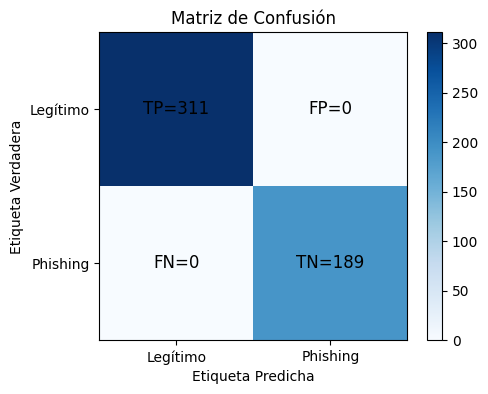

In [108]:
N = 500
ground_truth = ds_email['test']['label'][:N]
email_test = ds_email['test']['content'][:N]
predictions = []

preds = phishing_detector(email_test,truncation=True) #truncation=True para secuencias largas
for i in range(len(preds)):
    predictions.append(int(preds[i][0]['label'][-1:]))

metrics = evaluate(predictions, ground_truth)

Dado que todas las métricas son 1 en las predicciones de las primeras 50 muestras, nuestro modelo completo muestra una capacidad muy poderosa para detectar correctamente los correos de phishing.


## Asistente LLM


Aquí construiremos un asistente LLM para analizar posibles correos de phishing. Usaremos IBM Granite, diseñado para ofrecer un razonamiento más sólido, manejo de contextos más largos y rendimiento mejorado en tareas empresariales.

Definimos algunas variables clave que controlan qué modelo se carga:

- `CREDENTIALS`: Credenciales de autenticación que especifican el endpoint de IBM Cloud (las claves API son opcionales en este entorno).
- `LLM_Granite`: El modelo específico de Granite a cargar — aquí usamos la variante **8B Instruct**, optimizada para tareas de seguimiento de instrucciones.
- `PROJECT_ID`: El proyecto de IBM Cloud donde se ejecutará el trabajo de inferencia.
- `SYSTEM_PROMPT`: Una instrucción que define el rol y establece al asistente como un **analista de seguridad** encargado de analizar correos y extraer palabras o frases sospechosas que puedan indicar intentos de phishing.

Finalmente, la clase `ModelInference` se utiliza para inicializar el modelo Granite con el proyecto y las credenciales dadas, dejándolo listo para procesar entradas y devolver salidas estructuradas.

En el ``SYSTEM_PROMPT``, le pedimos al LLM que organice sus respuestas en un formato JSON específico, lo que nos facilita extraer la información.


In [114]:
SYSTEM_PROMPT = """
Eres un asistente de seguridad. Se te dará un correo electrónico, y por favor analiza el correo y lista todas las palabras o frases sospechosas que indiquen un posible intento de phishing
con explicaciones.
Al final, da tu juicio final respondiendo ÚNICAMENTE Sí o No, y da tu puntuación de confianza entre 0 y 100.
Por favor, proporciona tu análisis en el siguiente formato JSON: { "explanations": "...", "final_judgement": "Sí/No", "confidence_score": 0-100 }.
"""
llm = ChatOllama(model="phi3:latest", base_url="http://192.168.17.34:11434")

Ahora definimos una función para ejecutar el LLM con un correo electrónico dado ``email_text``.


In [115]:
def analyze_suspicious_contents(email_text):
    messages = [
        SystemMessage(content=SYSTEM_PROMPT),
        HumanMessage(content=email_text)
    ]
    response = llm.invoke(messages)
    return response.content

Ejecutemos un ejemplo de correo de phishing.


In [126]:
#Ejemplo
email_text = """Estimado Cliente,

Notamos actividad inusual en su cuenta de PayPal. Para su protección, su cuenta ha sido limitada temporalmente.

Por favor, verifique la información de su cuenta de inmediato para evitar la suspensión.

👉 Haga clic en el enlace seguro a continuación para restaurar el acceso:
http://paypa1-security[.]com/verify

La falta de actualización de sus datos dentro de las 24 horas resultará en el cierre permanente de la cuenta.

Gracias por su pronta atención,
Equipo de Seguridad de PayPal"""

phishing_explain = analyze_suspicious_contents(email_text)
print(phishing_explain)


```json
{
  "explanations": [
    {
      "word_or_phrase": "actividad inusual",
      "suspicion": "Could be a tactic to alarm the user and make them act urgently.",
        },
    {
      "word_or_phrase": "limitada temporalmente",
      "suspicion": "General language used by scammers. It creates an air of false security."
        },
    {
"word_or_phrase": "enlace seguro a continuación",
  "suspicion": "Irregular wording and format could be misleading as links are commonly disguised in phishing emails.",
      },
     {
       "word_or_phrase": "[Paypa1-security] com/verify",
    "suspicion": "The domain 'paypa1' is a common misspelling of PayPal, used to trick users into trusting the link." 
        }  
      ],
     "final_judgement": "Sí",
       "confidence_score": 95
}


Crear un diccionario basado en la respuesta con ``ast.literal_eval()`` para que podamos extraer las respuestas y puntuaciones fácilmente.

``ast.literal_eval()`` en Python es una función dentro del módulo ``ast`` (Árboles de Sintaxis Abstracta) que evalúa de forma segura una cadena que contiene un literal o contenedor de Python. Está diseñada para analizar y evaluar cadenas que representan estructuras de datos básicas de Python como números, listas y diccionarios, etc.


In [127]:
import re
import ast
# Limpiar la respuesta para extraer solo el JSON (maneja casos donde el LLM agrega texto extra)
json_match = re.search(r'\{.*\}', phishing_explain, re.DOTALL)
if json_match:
    json_str = json_match.group(0)
    try:
        response_dict = ast.literal_eval(json_str)
    except (ValueError, SyntaxError):
        # Fallback a eval si literal_eval falla (menos seguro, úsalo con cuidado)
        response_dict = eval(json_str)
else:
    response_dict = {"explanations": "Error al parsear respuesta del LLM", "final_judgement": "No", "confidence_score": 0}

print(response_dict)
print(response_dict['explanations'])
print()
print(f'Juicio Final: {response_dict['final_judgement']}')
print()
print(f'Confianza: {response_dict['confidence_score']}')

{'explanations': [{'word_or_phrase': 'actividad inusual', 'suspicion': 'Could be a tactic to alarm the user and make them act urgently.'}, {'word_or_phrase': 'limitada temporalmente', 'suspicion': 'General language used by scammers. It creates an air of false security.'}, {'word_or_phrase': 'enlace seguro a continuación', 'suspicion': 'Irregular wording and format could be misleading as links are commonly disguised in phishing emails.'}, {'word_or_phrase': '[Paypa1-security] com/verify', 'suspicion': "The domain 'paypa1' is a common misspelling of PayPal, used to trick users into trusting the link."}], 'final_judgement': 'Sí', 'confidence_score': 95}
[{'word_or_phrase': 'actividad inusual', 'suspicion': 'Could be a tactic to alarm the user and make them act urgently.'}, {'word_or_phrase': 'limitada temporalmente', 'suspicion': 'General language used by scammers. It creates an air of false security.'}, {'word_or_phrase': 'enlace seguro a continuación', 'suspicion': 'Irregular wording an

## Construir una Aplicación Web Compartible con Gradio


Ya hemos construido todos los componentes esenciales para la aplicación web, y ahora vamos a ensamblarlos en una aplicación web con Gradio.

Gradio es una biblioteca de Python de código abierto que facilita la construcción y el uso compartido de aplicaciones web interactivas para modelos de machine learning con solo unas pocas líneas de código. Proporciona interfaces fáciles de usar como cuadros de texto, deslizadores o cargadores de archivos, permitiendo que cualquiera pruebe modelos en tiempo real directamente desde un navegador.

Primero, definamos algunas funciones que pueden organizar las predicciones de BERT.


In [128]:
def organize_predictions(legit, message_show=False):
    label_map = {'LABEL_0':'LEGÍTIMO ✅', 'LABEL_1':'SOSPECHOSO ‼️'}
    messages = []
    confidence_scores = []
    for b in range(len(legit)):
        conf_score = -1
        content_type = None
        for item in legit[b]:
            if item['score'] > conf_score:
                conf_score = item['score']
                content_type = label_map[item['label']]
            if message_show:
                print(f'{label_map[item['label']]}, puntuación: {round(item['score'],2)}')
        if message_show:
            print(f'Este contenido parece ser {content_type}.')
        messages.append(f'Este contenido parece ser {content_type}.')
        confidence_scores.append(conf_score)
    return messages, confidence_scores


def phishing_prediction(pipeline, email, message_show=False):
    #Solo procesamos un correo a la vez
    prediction_legit = pipeline(email)
    messages, confidence_scores = organize_predictions(prediction_legit, message_show=message_show)
    return prediction_legit, messages[0], confidence_scores[0]

# Redefinir nuestro phishing_detector con top_k=None para tener la puntuación de confianza.
phishing_detector = pipeline("text-classification", model=model_full, tokenizer=tokenizer, device=device, top_k=None)

# Ensamblar BERT y LLM en una sola función
def analyze_email(email):
    prediction_legit, message, conf_score_BERT = phishing_prediction(phishing_detector, email)
    phishing_explain = analyze_suspicious_contents(email)
    response_dict = eval(phishing_explain)
    conf_score_Granite = int(response_dict['confidence_score'])/100
    conf_score = None #puntuación de confianza final

    if conf_score_BERT < conf_score_Granite:
        conf_score = conf_score_Granite
        content_type = 'LEGÍTIMO ✅' if response_dict['final_judgement'] == 'No' else 'SOSPECHOSO ‼️'
        message = f'Este contenido parece ser {content_type}.'
    else:
        conf_score = conf_score_BERT

    if 0.5 <= conf_score < 0.6:
        decorate = "😐 (confianza baja)"
    elif 0.6 <= conf_score < 0.9:
        decorate = "🙂 (confianza media)"
    else:
        decorate = "💪 (confianza alta)"
    conf_score_message = f'{round(conf_score,2)*100}% {decorate}'

    return message, conf_score_message, response_dict['explanations']

Device set to use cpu


Ahora estamos listos para construir nuestra aplicación web. Aquí hay algunos componentes clave:

- `with gr.Blocks() as demo`: Crea un contenedor de aplicación Gradio (`demo`) usando la API `Blocks`, que te permite organizar componentes en filas, columnas y secciones.
- `gr.Markdown(...)`: Agrega texto formateado a la interfaz. Aquí, muestra un título (`"Demostración de Detección de Correos de Phishing"`) e instrucciones para el usuario.
- `email_body = gr.Textbox(...)`: Un cuadro de texto multilínea donde el usuario pega el cuerpo del correo a analizar.
- `submit = gr.Button("Analizar Correo")`: Un botón etiquetado `"Analizar Correo"`. Cuando se hace clic, activa la función de análisis de correo.
- `with gr.Row()`: Crea un diseño de fila horizontal para colocar múltiples componentes uno al lado del otro.
- `message = gr.Label(label="Mensaje")`: Una etiqueta de salida que mostrará el resultado de la predicción (ej., `"Phishing detectado"` o `"Correo legítimo"`).
- `confidence_out = gr.Label(label="Puntuación de Confianza")`: Una etiqueta de salida que muestra el porcentaje de confianza del modelo junto con un indicador emoji.
- `explanation_out = gr.Textbox(...)`: Un cuadro de texto de solo lectura donde se muestran las palabras/frases sospechosas como explicación.
- `submit.click(...)`: Vincula el botón a la función de análisis.
- `demo.launch(share=True)`: Inicia la aplicación Gradio y genera un enlace público compartible para que otros puedan acceder a la demostración de detección de phishing en su navegador.


In [129]:
# Interfaz de Gradio
with gr.Blocks() as demo:
    gr.Markdown("## 🛡️ Demostración de Detección de Correos de Phishing")
    gr.Markdown("Pega un correo electrónico a continuación para verificar si es sospechoso o legítimo.")

    # with gr.Row():
    #     subject = gr.Textbox(label="Asunto del Correo", placeholder="Ingresar asunto")
    email_body = gr.Textbox(label="Cuerpo del Correo", lines=10, placeholder="Pega el contenido del correo aquí...")
    submit = gr.Button("Analizar Correo")

    with gr.Row():
        message = gr.Label(label="Mensaje")
        confidence_out = gr.Label(label="Puntuación de Confianza")
    explanation_out = gr.Textbox(label="Explicación", lines=10, interactive=False)

    submit.click(analyze_email, inputs=[email_body], outputs=[message, confidence_out, explanation_out])

if __name__ == "__main__":
    demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Traceback (most recent call last):
  File "c:\proyectos\VALIDADOR_MAIL\venv\Lib\site-packages\gradio\queueing.py", line 745, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "c:\proyectos\VALIDADOR_MAIL\venv\Lib\site-packages\gradio\route_utils.py", line 349, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<11 lines>...
    )
    ^
  File "c:\proyectos\VALIDADOR_MAIL\venv\Lib\site-packages\gradio\blocks.py", line 2123, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<8 lines>...
    )
    ^
  File "c:\proyectos\VALIDADOR_MAIL\venv\Lib\site-packages\gradio\blocks.py", line 1630, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        fn, *processed_input,

¡Felicidades! ¡Ahora puedes compartir este enlace con tus amigos!!

__Nota__: Dado que nuestro conjunto de datos de entrenamiento es relativamente pequeño y el LLM no es infalible, aún puede haber casos extremos que se escapen al detector.


## Conclusión

Este cuaderno demuestra cómo la IA moderna se puede aplicar eficazmente a la detección de correos de phishing. Logramos lo siguiente:

- **Clasificador Transformer Ajustado Finamente**:
  Ajustamos finamente un modelo transformer ligero (ej., DistilBERT/DistilRoBERTa) en un conjunto de datos de phishing para clasificar correos como *legítimos* o *sospechosos*.

- **LLM como Segunda Capa de Defensa**:
  Integramos un modelo de lenguaje grande (IBM Granite) para analizar más a fondo los correos y extraer palabras clave o frases sospechosas que puedan indicar estrategias de phishing.

- **Interfaz Fácil de Usar**:
  Construimos una aplicación web Gradio que permite a los usuarios pegar un correo, recibir un resultado de clasificación, ver la puntuación de confianza con señales visuales (emojis), y leer una explicación de por qué el correo puede ser arriesgado.

- **Precisión e Interpretabilidad Mejoradas**:
  Al combinar un clasificador ajustado finamente con un LLM, el sistema no solo mejora el rendimiento de detección sino que también aumenta la transparencia, ayudando a los usuarios a confiar en los resultados.

- **Relevancia en el Mundo Real**:
  El proyecto destaca cómo las herramientas de IA explicable pueden mejorar la ciberseguridad al ofrecer tanto detección automatizada como ideas legibles por humanos.


### Preprocesar el conjunto de datos de URL para el ajuste fino de BERT


In [134]:
# Ejercicio 1 - Preprocesar el conjunto de datos de URL para el ajuste fino de BERT

# Usa el ds_url creado anteriormente (de split_data_to_email_url y filtrado)

# Paso 1: baraja ds_url con seed 0
ds_url = ds_url.shuffle(seed=0)

# Paso 2: divide ds_url en porciones de entrenamiento y prueba
ds_url = ds_url.train_test_split(test_size=0.2, shuffle=False)

# Paso 3: tokenízalo con .map y tokenize_function
tokenized_datasets = ds_url.map(tokenize_function, batched=True)

# Paso 4: renombra la columna 'label' a 'labels' para la API Trainer y elimina columnas innecesarias
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.remove_columns(["content"])

# Paso 5: formatea los conjuntos de datos para que devuelvan tensores de PyTorch
tokenized_datasets.set_format("torch")

# Verifica el resultado
print(tokenized_datasets)


Map: 100%|██████████| 35472/35472 [00:09<00:00, 3773.04 examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 141884
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 35472
    })
})


### Configurar el Trainer de BERT con respecto al conjunto de datos de URL


In [135]:
# Ejercicio 2 - Configurar el Trainer de BERT con respecto al conjunto de datos de URL

# Paso 0: crea un conjunto de datos de juguete para ds_url con 5 urls legítimas y 5 urls de phishing, y 1 dato de prueba
ds_toy = full_toy_data(dataset_full=ds_url,
                        n_train_legit=5,
                        n_train_phish=5,
                        n_test=1)

# Verifica el conjunto de datos de juguete
print(ds_toy)

# Paso 1: crea una clase de argumentos de entrenamiento con tamaño de lote 1 y número de épocas de entrenamiento 2
training_args = TrainingArguments(
    output_dir="./results",          
    eval_strategy="epoch",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=2,              
    logging_dir="./logs",            
    report_to="none",                
)

# Paso 2: crea un objeto trainer para el conjunto de datos de URL preprocesado
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],  # Usa el tokenized_datasets del Ejercicio 1
    eval_dataset=tokenized_datasets["test"],
)

# Paso 3: inicia el entrenamiento
# Nota: El entrenamiento está comentado porque puede tardar mucho en CPU. Descoméntalo para ejecutarlo.
# trainer.train()

# Paso 4: guarda el modelo
# model.save_pretrained('./saved_model_toy_url/')


Filter: 100%|██████████| 141884/141884 [00:01<00:00, 101819.17 examples/s]

DatasetDict({
    train: Dataset({
        features: ['content', 'label'],
        num_rows: 10
    })
    test: Dataset({
        features: ['content', 'label'],
        num_rows: 1
    })
})


## Autores


[Jianping Ye](https://www.linkedin.com/in/jianping-ye/)


### Otros Colaboradores


[Wojciech "Victor" Fulmyk](https://www.linkedin.com/in/wfulmyk)

[Joseph Santarcangelo](https://author.skills.network/instructors/joseph_santarcangelo)

[Matthew Wu](https://www.linkedin.com/in/mwuatthew/)


## Registro de Cambios


|Fecha (AAAA-MM-DD)|Versión|Cambiado Por|Descripción del Cambio|
|-|-|-|-|
|2025-09-14|0.1|Jianping Ye|Crear el laboratorio|


Copyright © 2020 IBM Corporation. Todos los derechos reservados.
